# Imports and clone 'MRI' generation repository from GitHub

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

!git clone https://github.com/JamesCallanan/Grad-CAM.git

%cd /content/Grad-CAM

from DataGenerator import make_mri_and_seg_mask, make_MRI_dataset
from MRIDetails import EXPERIMENT_MODE, disease_details, SEG_MASK_KEYS
from Heatmaps import make_gradcam_heatmap, display_gradcam_heatmap, return_gradcam_heatmap
%cd /content/

Mounted at /content/gdrive/
Cloning into 'Grad-CAM'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 144 (delta 80), reused 86 (delta 36), pack-reused 0
Receiving objects: 100% (144/144), 29.53 KiB | 975.00 KiB/s, done.
Resolving deltas: 100% (80/80), done.
/content/Grad-CAM
/content


## Generate MRIs



In [2]:
from enum import Enum

dataset_size = 16

class DISEASE_LABELS(Enum):
  NOR = [1,0,0,0]
  HCM = [0,1,0,0]
  DCM = [0,0,1,0]
  RV = [0,0,0,1]

class DISEASE_LABEL_SIMPLIFIED(Enum):
  NOR = 0 
  DCM = 1
  

## Experiment 1 MRIs: Different size hearts for males and females

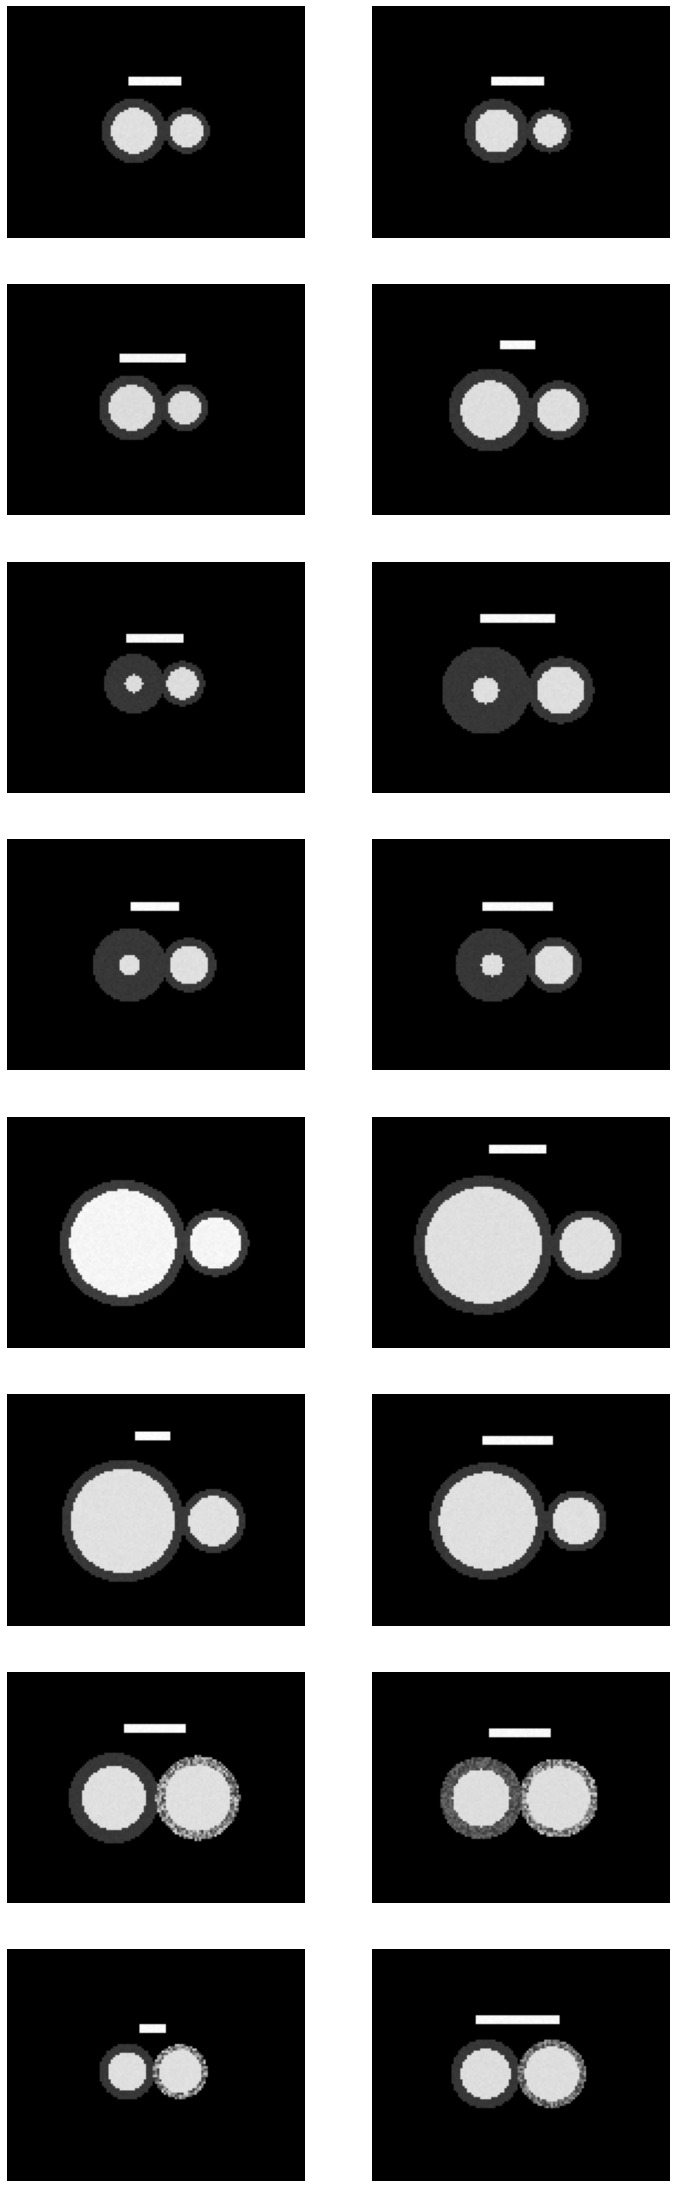

In [28]:
experiment_mode = EXPERIMENT_MODE.different_size_male_female.value
dataset_size = 16
dataset = make_MRI_dataset(dataset_size, DISEASE_LABELS, experiment_mode)

diff_size_mris_unprocessed = dataset['mris_unprocessed']
diff_size_mris_preprocessed = dataset['mris_preprocessed']

fig, axes = plt.subplots(8,2, figsize=(6*2, 2*20))
axes[0,0].imshow(diff_size_mris_unprocessed[0,:,:,0], cmap='gray')
axes[0,1].imshow(diff_size_mris_unprocessed[1,:,:,0], cmap='gray')
axes[1,0].imshow(diff_size_mris_unprocessed[2,:,:,0], cmap='gray')
axes[1,1].imshow(diff_size_mris_unprocessed[3,:,:,0], cmap='gray')
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()

axes[2,0].imshow(diff_size_mris_unprocessed[4,:,:,0], cmap='gray')
axes[2,1].imshow(diff_size_mris_unprocessed[5,:,:,0], cmap='gray')
axes[3,0].imshow(diff_size_mris_unprocessed[6,:,:,0], cmap='gray')
axes[3,1].imshow(diff_size_mris_unprocessed[7,:,:,0], cmap='gray')
axes[2,0].set_axis_off()
axes[2,1].set_axis_off()
axes[3,0].set_axis_off()
axes[3,1].set_axis_off()

axes[4,0].imshow(diff_size_mris_unprocessed[8,:,:,0], cmap='gray')
axes[4,1].imshow(diff_size_mris_unprocessed[9,:,:,0], cmap='gray')
axes[5,0].imshow(diff_size_mris_unprocessed[10,:,:,0], cmap='gray')
axes[5,1].imshow(diff_size_mris_unprocessed[11,:,:,0], cmap='gray')
axes[4,0].set_axis_off()
axes[4,1].set_axis_off()
axes[5,0].set_axis_off()
axes[5,1].set_axis_off()

axes[6,0].imshow(diff_size_mris_unprocessed[12,:,:,0], cmap='gray')
axes[6,1].imshow(diff_size_mris_unprocessed[13,:,:,0], cmap='gray')
axes[7,0].imshow(diff_size_mris_unprocessed[14,:,:,0], cmap='gray')
axes[7,1].imshow(diff_size_mris_unprocessed[15,:,:,0], cmap='gray')
axes[6,0].set_axis_off()
axes[6,1].set_axis_off()
axes[7,0].set_axis_off()
axes[7,1].set_axis_off()


## Experiment 2 MRIs: Same size hearts for males and females

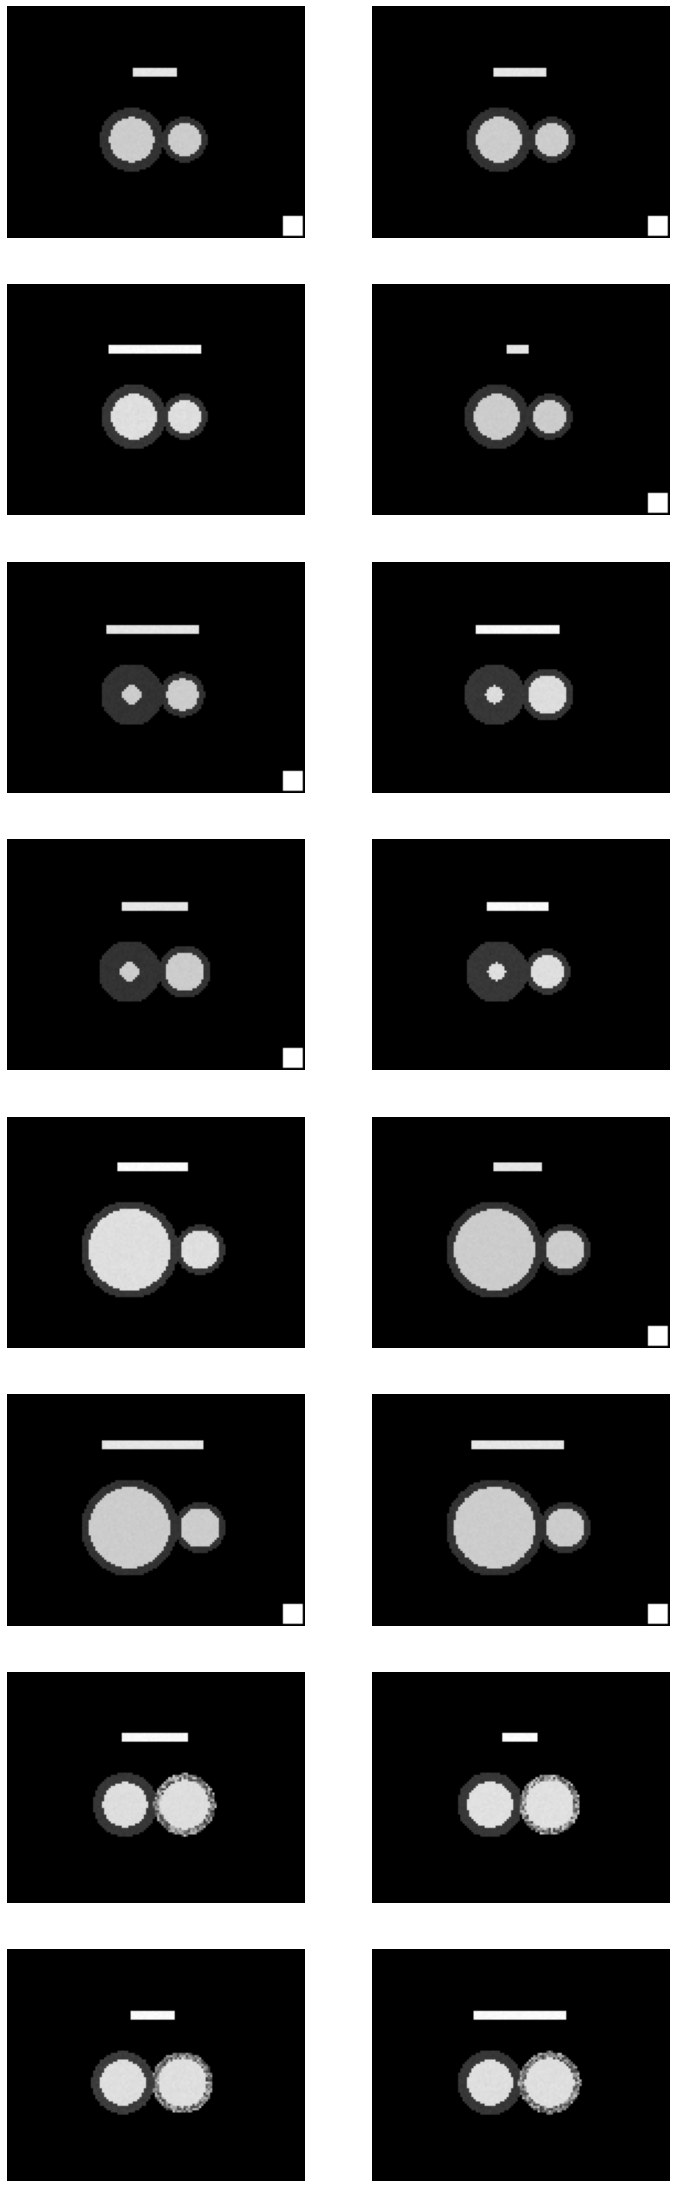

In [29]:
experiment_mode = EXPERIMENT_MODE.same_size_male_female.value
dataset_size = 16
dataset = make_MRI_dataset(dataset_size, DISEASE_LABELS, experiment_mode)

same_size_mris_unprocessed = dataset['mris_unprocessed']
same_size_mris_preprocessed = dataset['mris_preprocessed']

fig, axes = plt.subplots(8,2, figsize=(6*2, 2*20))
axes[0,0].imshow(same_size_mris_unprocessed[0,:,:,0], cmap='gray')
axes[0,1].imshow(same_size_mris_unprocessed[1,:,:,0], cmap='gray')
axes[1,0].imshow(same_size_mris_unprocessed[2,:,:,0], cmap='gray')
axes[1,1].imshow(same_size_mris_unprocessed[3,:,:,0], cmap='gray')
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()

axes[2,0].imshow(same_size_mris_unprocessed[4,:,:,0], cmap='gray')
axes[2,1].imshow(same_size_mris_unprocessed[5,:,:,0], cmap='gray')
axes[3,0].imshow(same_size_mris_unprocessed[6,:,:,0], cmap='gray')
axes[3,1].imshow(same_size_mris_unprocessed[7,:,:,0], cmap='gray')
axes[2,0].set_axis_off()
axes[2,1].set_axis_off()
axes[3,0].set_axis_off()
axes[3,1].set_axis_off()

axes[4,0].imshow(same_size_mris_unprocessed[8,:,:,0], cmap='gray')
axes[4,1].imshow(same_size_mris_unprocessed[9,:,:,0], cmap='gray')
axes[5,0].imshow(same_size_mris_unprocessed[10,:,:,0], cmap='gray')
axes[5,1].imshow(same_size_mris_unprocessed[11,:,:,0], cmap='gray')
axes[4,0].set_axis_off()
axes[4,1].set_axis_off()
axes[5,0].set_axis_off()
axes[5,1].set_axis_off()

axes[6,0].imshow(same_size_mris_unprocessed[12,:,:,0], cmap='gray')
axes[6,1].imshow(same_size_mris_unprocessed[13,:,:,0], cmap='gray')
axes[7,0].imshow(same_size_mris_unprocessed[14,:,:,0], cmap='gray')
axes[7,1].imshow(same_size_mris_unprocessed[15,:,:,0], cmap='gray')
axes[6,0].set_axis_off()
axes[6,1].set_axis_off()
axes[7,0].set_axis_off()
axes[7,1].set_axis_off()


# Model paths
These were randomly chosen from the list of all runs that achieved >95% test accuracy for the given experiment.


In [16]:
exp1_CCE_path = '/content/gdrive/MyDrive/ME Project/New idea/Results/Experiment 1/Normal loss/cece3354-493c-461d-b74e-4eba02fcde6b/Models/3'
exp1_heatmap_path = '/content/gdrive/MyDrive/ME Project/New idea/Results/Experiment 1/Heatmap loss/dfd6dd7e-a034-4ffa-86e6-b9761b906e16/Models/5'
exp2_CCE_path = '/content/gdrive/MyDrive/ME Project/New idea/Results/Experiment 2/Normal loss/60b86503-ab80-4f5a-895a-f4101bc1a9dc/Models/1'
exp2_heatmap_path = '/content/gdrive/MyDrive/ME Project/New idea/Results/Experiment 2/Normal loss/93c33f91-96d3-450c-8254-2529b2370f10/Models/4'

# Load CCE models

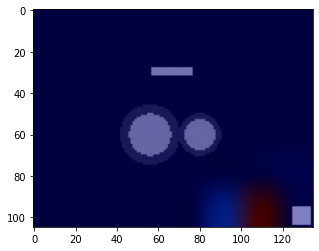

In [18]:
exp1_cce_model = tf.keras.models.load_model(exp1_CCE_path)
exp2_cce_model = tf.keras.models.load_model(exp2_CCE_path)

def plot_heatmap(mri_preprocessed, mri_unprocessed, model):
  mri_for_model = np.expand_dims(mri_preprocessed,0)
  mri_visualisation = mri_unprocessed
  gradcam_heatmap, hirescam_heatmap = make_gradcam_heatmap(mri_for_model, model, last_conv_layer_name='block5_conv3')
  return return_gradcam_heatmap(mri_visualisation, gradcam_heatmap, alpha=0.5, beta=0.5)

plt.imshow(plot_heatmap(same_size_mris_preprocessed[0,:,:,:], same_size_mris_unprocessed[0,:,:,:], exp1_cce_model))


# Heatmaps for experiment 1, CCE model

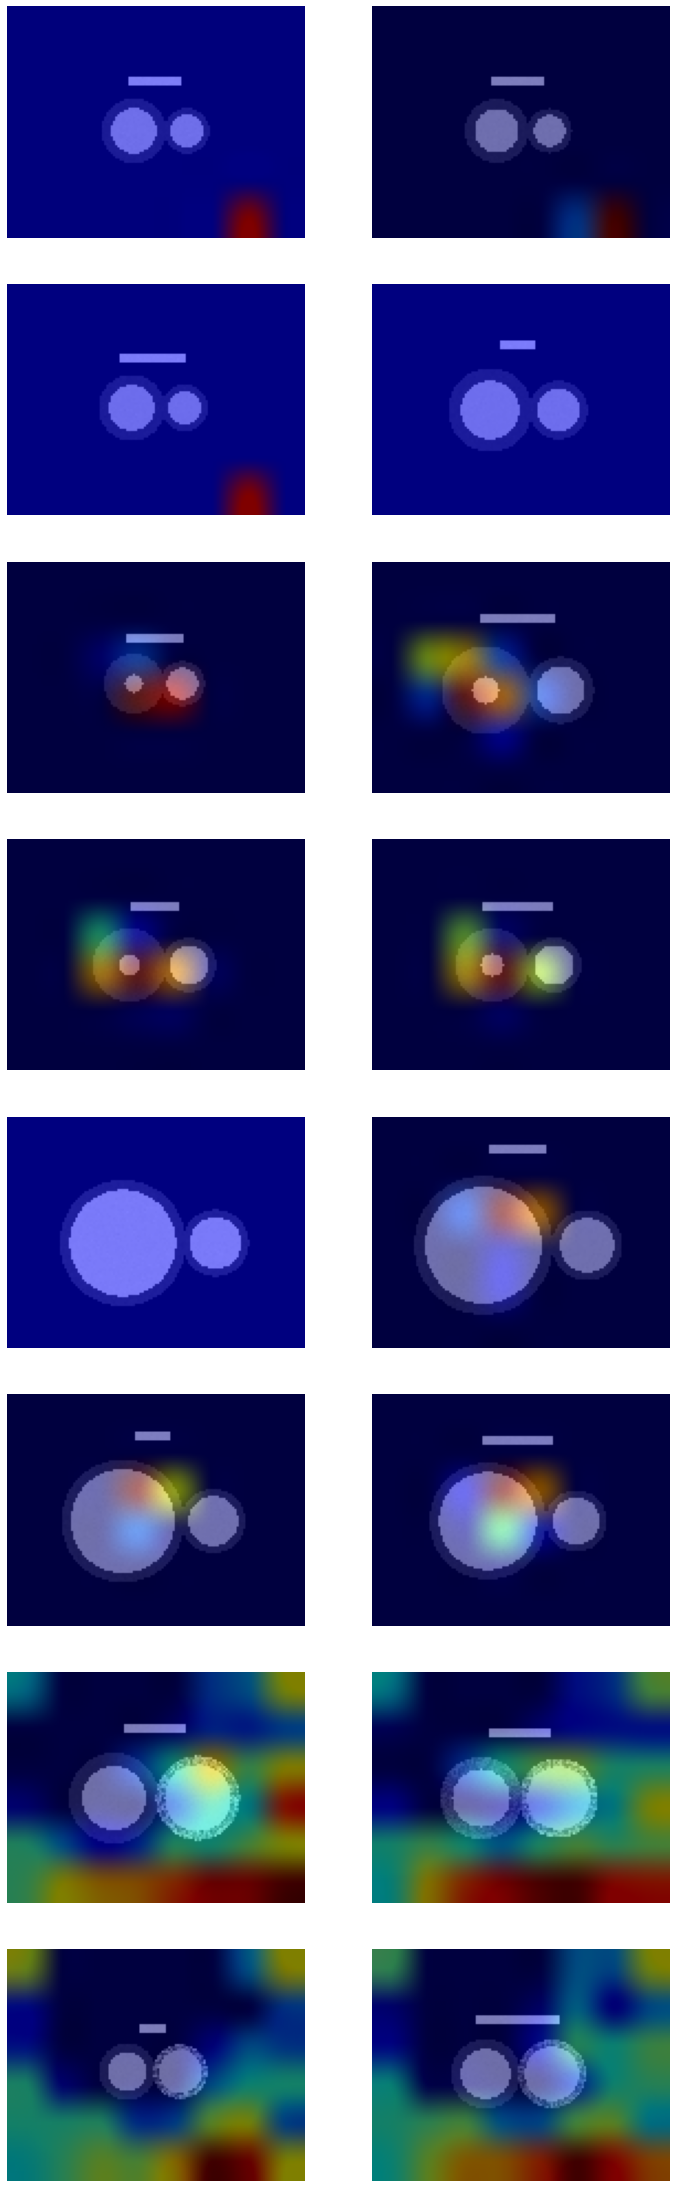

In [25]:
fig, axes = plt.subplots(8,2, figsize=(6*2, 2*20))
axes[0,0].imshow(plot_heatmap(diff_size_mris_preprocessed[0,:,:,:], diff_size_mris_unprocessed[0,:,:,:], exp1_cce_model), cmap='gray')
axes[0,1].imshow(plot_heatmap(diff_size_mris_preprocessed[1,:,:,:], diff_size_mris_unprocessed[1,:,:,:], exp1_cce_model), cmap='gray')
axes[1,0].imshow(plot_heatmap(diff_size_mris_preprocessed[2,:,:,:], diff_size_mris_unprocessed[2,:,:,:], exp1_cce_model), cmap='gray')
axes[1,1].imshow(plot_heatmap(diff_size_mris_preprocessed[3,:,:,:], diff_size_mris_unprocessed[3,:,:,:], exp1_cce_model), cmap='gray')
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()

axes[2,0].imshow(plot_heatmap(diff_size_mris_preprocessed[4,:,:,:], diff_size_mris_unprocessed[4,:,:,:], exp1_cce_model), cmap='gray')
axes[2,1].imshow(plot_heatmap(diff_size_mris_preprocessed[5,:,:,:], diff_size_mris_unprocessed[5,:,:,:], exp1_cce_model), cmap='gray')
axes[3,0].imshow(plot_heatmap(diff_size_mris_preprocessed[6,:,:,:], diff_size_mris_unprocessed[6,:,:,:], exp1_cce_model), cmap='gray')
axes[3,1].imshow(plot_heatmap(diff_size_mris_preprocessed[7,:,:,:], diff_size_mris_unprocessed[7,:,:,:], exp1_cce_model), cmap='gray')
axes[2,0].set_axis_off()
axes[2,1].set_axis_off()
axes[3,0].set_axis_off()
axes[3,1].set_axis_off()

axes[4,0].imshow(plot_heatmap(diff_size_mris_preprocessed[8,:,:,:], diff_size_mris_unprocessed[8,:,:,:], exp1_cce_model), cmap='gray')
axes[4,1].imshow(plot_heatmap(diff_size_mris_preprocessed[9,:,:,:], diff_size_mris_unprocessed[9,:,:,:], exp1_cce_model), cmap='gray')
axes[5,0].imshow(plot_heatmap(diff_size_mris_preprocessed[10,:,:,:], diff_size_mris_unprocessed[10,:,:,:], exp1_cce_model),  cmap='gray')
axes[5,1].imshow(plot_heatmap(diff_size_mris_preprocessed[11,:,:,:], diff_size_mris_unprocessed[11,:,:,:], exp1_cce_model),  cmap='gray')
axes[4,0].set_axis_off()
axes[4,1].set_axis_off()
axes[5,0].set_axis_off()
axes[5,1].set_axis_off()

axes[6,0].imshow(plot_heatmap(diff_size_mris_preprocessed[12,:,:,:], diff_size_mris_unprocessed[12,:,:,:], exp1_cce_model),  cmap='gray')
axes[6,1].imshow(plot_heatmap(diff_size_mris_preprocessed[13,:,:,:], diff_size_mris_unprocessed[13,:,:,:], exp1_cce_model),  cmap='gray')
axes[7,0].imshow(plot_heatmap(diff_size_mris_preprocessed[14,:,:,:], diff_size_mris_unprocessed[14,:,:,:], exp1_cce_model),  cmap='gray')
axes[7,1].imshow(plot_heatmap(diff_size_mris_preprocessed[15,:,:,:], diff_size_mris_unprocessed[15,:,:,:], exp1_cce_model),  cmap='gray')
axes[6,0].set_axis_off()
axes[6,1].set_axis_off()
axes[7,0].set_axis_off()
axes[7,1].set_axis_off()


# Heatmaps for experiment 2, CCE model

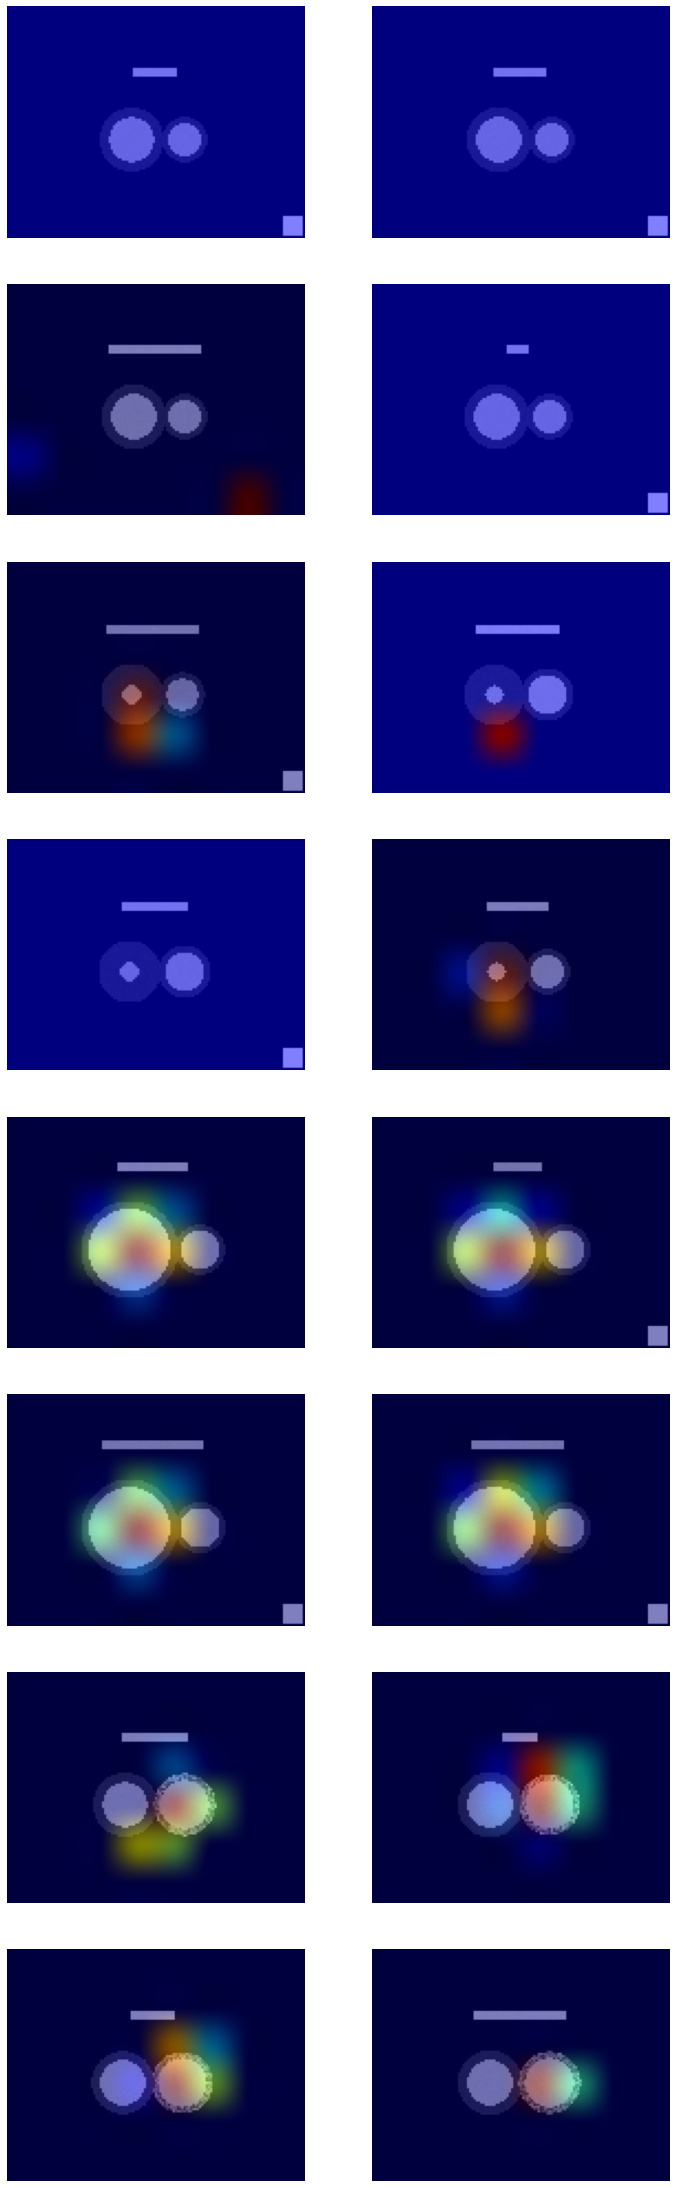

In [24]:
fig, axes = plt.subplots(8,2, figsize=(6*2, 2*20))
axes[0,0].imshow(plot_heatmap(same_size_mris_preprocessed[0,:,:,:], same_size_mris_unprocessed[0,:,:,:], exp2_cce_model), cmap='gray')
axes[0,1].imshow(plot_heatmap(same_size_mris_preprocessed[1,:,:,:], same_size_mris_unprocessed[1,:,:,:], exp2_cce_model), cmap='gray')
axes[1,0].imshow(plot_heatmap(same_size_mris_preprocessed[2,:,:,:], same_size_mris_unprocessed[2,:,:,:], exp2_cce_model), cmap='gray')
axes[1,1].imshow(plot_heatmap(same_size_mris_preprocessed[3,:,:,:], same_size_mris_unprocessed[3,:,:,:], exp2_cce_model), cmap='gray')
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()

axes[2,0].imshow(plot_heatmap(same_size_mris_preprocessed[4,:,:,:], same_size_mris_unprocessed[4,:,:,:], exp2_cce_model), cmap='gray')
axes[2,1].imshow(plot_heatmap(same_size_mris_preprocessed[5,:,:,:], same_size_mris_unprocessed[5,:,:,:], exp2_cce_model), cmap='gray')
axes[3,0].imshow(plot_heatmap(same_size_mris_preprocessed[6,:,:,:], same_size_mris_unprocessed[6,:,:,:], exp2_cce_model), cmap='gray')
axes[3,1].imshow(plot_heatmap(same_size_mris_preprocessed[7,:,:,:], same_size_mris_unprocessed[7,:,:,:], exp2_cce_model), cmap='gray')
axes[2,0].set_axis_off()
axes[2,1].set_axis_off()
axes[3,0].set_axis_off()
axes[3,1].set_axis_off()

axes[4,0].imshow(plot_heatmap(same_size_mris_preprocessed[8,:,:,:], same_size_mris_unprocessed[8,:,:,:], exp2_cce_model), cmap='gray')
axes[4,1].imshow(plot_heatmap(same_size_mris_preprocessed[9,:,:,:], same_size_mris_unprocessed[9,:,:,:], exp2_cce_model), cmap='gray')
axes[5,0].imshow(plot_heatmap(same_size_mris_preprocessed[10,:,:,:], same_size_mris_unprocessed[10,:,:,:], exp2_cce_model),  cmap='gray')
axes[5,1].imshow(plot_heatmap(same_size_mris_preprocessed[11,:,:,:], same_size_mris_unprocessed[11,:,:,:], exp2_cce_model),  cmap='gray')
axes[4,0].set_axis_off()
axes[4,1].set_axis_off()
axes[5,0].set_axis_off()
axes[5,1].set_axis_off()

axes[6,0].imshow(plot_heatmap(same_size_mris_preprocessed[12,:,:,:], same_size_mris_unprocessed[12,:,:,:], exp2_cce_model),  cmap='gray')
axes[6,1].imshow(plot_heatmap(same_size_mris_preprocessed[13,:,:,:], same_size_mris_unprocessed[13,:,:,:], exp2_cce_model),  cmap='gray')
axes[7,0].imshow(plot_heatmap(same_size_mris_preprocessed[14,:,:,:], same_size_mris_unprocessed[14,:,:,:], exp2_cce_model),  cmap='gray')
axes[7,1].imshow(plot_heatmap(same_size_mris_preprocessed[15,:,:,:], same_size_mris_unprocessed[15,:,:,:], exp2_cce_model),  cmap='gray')
axes[6,0].set_axis_off()
axes[6,1].set_axis_off()
axes[7,0].set_axis_off()
axes[7,1].set_axis_off()


# Load heatmap models

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import Model
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

num_output_neurons = 4

from tensorflow.keras.utils import to_categorical

last_conv_layer_name = 'block5_conv3'
class CustomModel(tf.keras.Model):
    def tokenFn():
      print('Hello World')

def get_model(lr, units_dense_1):
  model = VGG16(include_top=False, input_shape=(105, 135,3))
  for layer in model.layers:
    layer.trainable = True
  x = Flatten()(model.layers[-1].output)
  x = Dense(units_dense_1, activation='relu', kernel_initializer='he_uniform')(x)  
  logits = Dense(num_output_neurons, activation=None, name='logits')(x)
  output = tf.keras.activations.sigmoid(logits)
  model = CustomModel(inputs=model.inputs, outputs=output)
  opt = Adam(learning_rate=lr)
  return model

exp1_heatmap = get_model(lr=0.000005, units_dense_1 = 100)
exp1_heatmap.load_weights(exp1_heatmap_path)

exp2_heatmap = get_model(lr=0.000005, units_dense_1 = 100)
exp2_heatmap.load_weights(exp2_heatmap_path)


58900480/58889256 [==============================] - 0s 0us/step


# Heatmaps for experiment 1, heatmap model

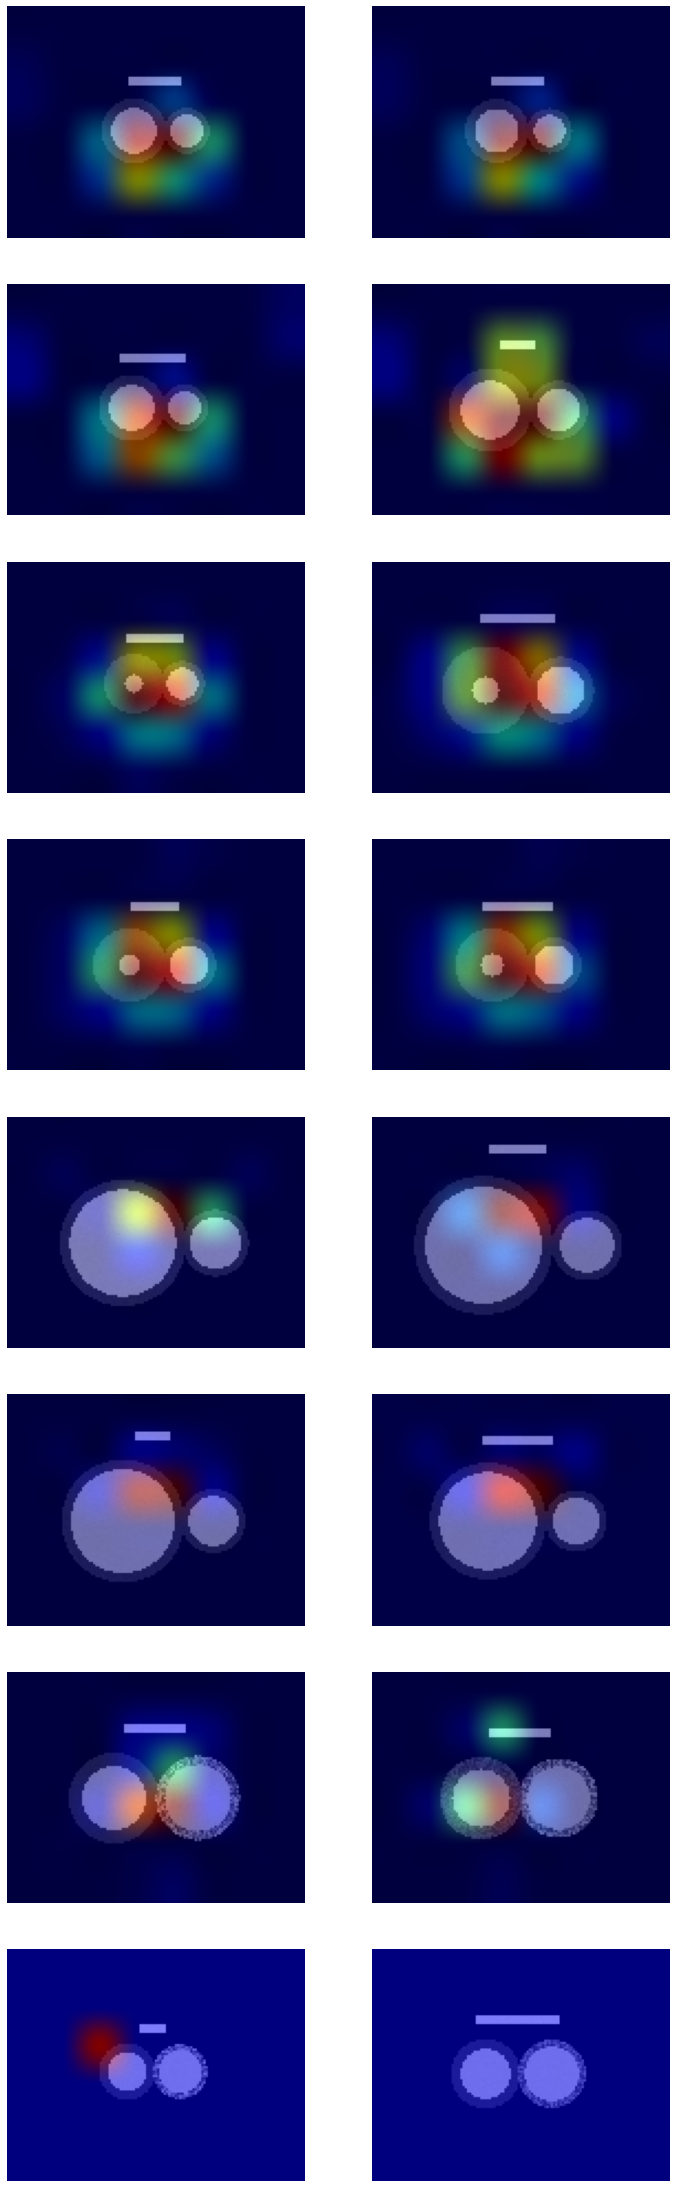

In [27]:
fig, axes = plt.subplots(8,2, figsize=(6*2, 2*20))
axes[0,0].imshow(plot_heatmap(diff_size_mris_preprocessed[0,:,:,:], diff_size_mris_unprocessed[0,:,:,:], exp1_heatmap), cmap='gray')
axes[0,1].imshow(plot_heatmap(diff_size_mris_preprocessed[1,:,:,:], diff_size_mris_unprocessed[1,:,:,:], exp1_heatmap), cmap='gray')
axes[1,0].imshow(plot_heatmap(diff_size_mris_preprocessed[2,:,:,:], diff_size_mris_unprocessed[2,:,:,:], exp1_heatmap), cmap='gray')
axes[1,1].imshow(plot_heatmap(diff_size_mris_preprocessed[3,:,:,:], diff_size_mris_unprocessed[3,:,:,:], exp1_heatmap), cmap='gray')
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()

axes[2,0].imshow(plot_heatmap(diff_size_mris_preprocessed[4,:,:,:], diff_size_mris_unprocessed[4,:,:,:], exp1_heatmap), cmap='gray')
axes[2,1].imshow(plot_heatmap(diff_size_mris_preprocessed[5,:,:,:], diff_size_mris_unprocessed[5,:,:,:], exp1_heatmap), cmap='gray')
axes[3,0].imshow(plot_heatmap(diff_size_mris_preprocessed[6,:,:,:], diff_size_mris_unprocessed[6,:,:,:], exp1_heatmap), cmap='gray')
axes[3,1].imshow(plot_heatmap(diff_size_mris_preprocessed[7,:,:,:], diff_size_mris_unprocessed[7,:,:,:], exp1_heatmap), cmap='gray')
axes[2,0].set_axis_off()
axes[2,1].set_axis_off()
axes[3,0].set_axis_off()
axes[3,1].set_axis_off()

axes[4,0].imshow(plot_heatmap(diff_size_mris_preprocessed[8,:,:,:], diff_size_mris_unprocessed[8,:,:,:], exp1_heatmap), cmap='gray')
axes[4,1].imshow(plot_heatmap(diff_size_mris_preprocessed[9,:,:,:], diff_size_mris_unprocessed[9,:,:,:], exp1_heatmap), cmap='gray')
axes[5,0].imshow(plot_heatmap(diff_size_mris_preprocessed[10,:,:,:], diff_size_mris_unprocessed[10,:,:,:], exp1_heatmap),  cmap='gray')
axes[5,1].imshow(plot_heatmap(diff_size_mris_preprocessed[11,:,:,:], diff_size_mris_unprocessed[11,:,:,:], exp1_heatmap),  cmap='gray')
axes[4,0].set_axis_off()
axes[4,1].set_axis_off()
axes[5,0].set_axis_off()
axes[5,1].set_axis_off()

axes[6,0].imshow(plot_heatmap(diff_size_mris_preprocessed[12,:,:,:], diff_size_mris_unprocessed[12,:,:,:], exp1_heatmap),  cmap='gray')
axes[6,1].imshow(plot_heatmap(diff_size_mris_preprocessed[13,:,:,:], diff_size_mris_unprocessed[13,:,:,:], exp1_heatmap),  cmap='gray')
axes[7,0].imshow(plot_heatmap(diff_size_mris_preprocessed[14,:,:,:], diff_size_mris_unprocessed[14,:,:,:], exp1_heatmap),  cmap='gray')
axes[7,1].imshow(plot_heatmap(diff_size_mris_preprocessed[15,:,:,:], diff_size_mris_unprocessed[15,:,:,:], exp1_heatmap),  cmap='gray')
axes[6,0].set_axis_off()
axes[6,1].set_axis_off()
axes[7,0].set_axis_off()
axes[7,1].set_axis_off()


# Heatmaps for experiment 2, heatmap model

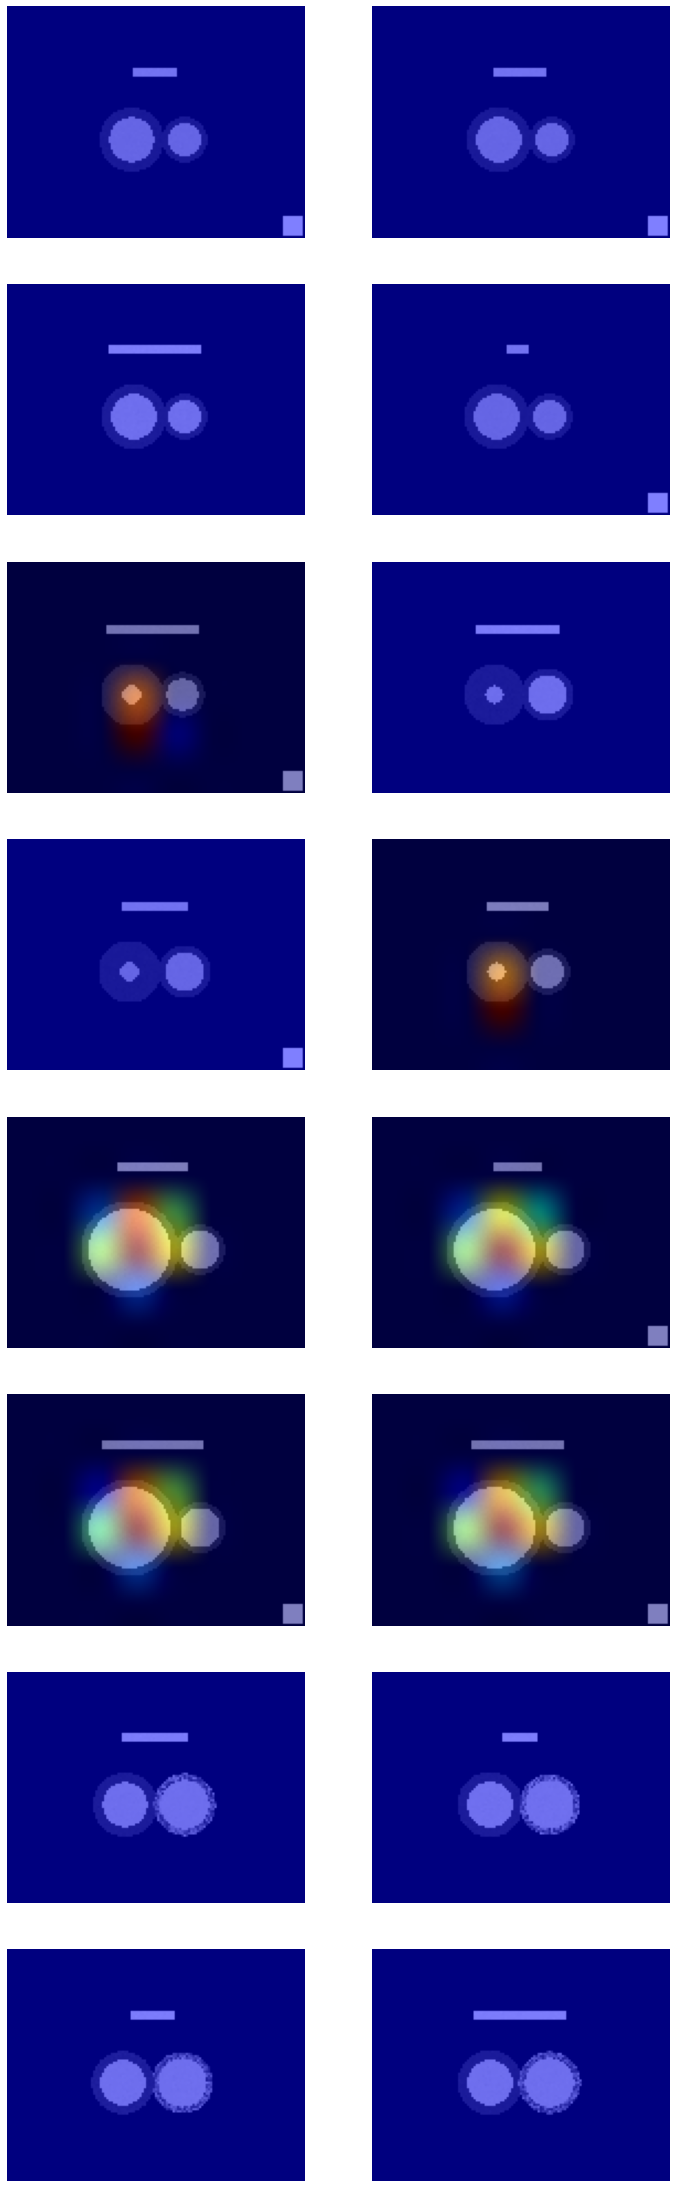

In [26]:
fig, axes = plt.subplots(8,2, figsize=(6*2, 2*20))
axes[0,0].imshow(plot_heatmap(same_size_mris_preprocessed[0,:,:,:], same_size_mris_unprocessed[0,:,:,:], exp2_heatmap), cmap='gray')
axes[0,1].imshow(plot_heatmap(same_size_mris_preprocessed[1,:,:,:], same_size_mris_unprocessed[1,:,:,:], exp2_heatmap), cmap='gray')
axes[1,0].imshow(plot_heatmap(same_size_mris_preprocessed[2,:,:,:], same_size_mris_unprocessed[2,:,:,:], exp2_heatmap), cmap='gray')
axes[1,1].imshow(plot_heatmap(same_size_mris_preprocessed[3,:,:,:], same_size_mris_unprocessed[3,:,:,:], exp2_heatmap), cmap='gray')
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()

axes[2,0].imshow(plot_heatmap(same_size_mris_preprocessed[4,:,:,:], same_size_mris_unprocessed[4,:,:,:], exp2_heatmap), cmap='gray')
axes[2,1].imshow(plot_heatmap(same_size_mris_preprocessed[5,:,:,:], same_size_mris_unprocessed[5,:,:,:], exp2_heatmap), cmap='gray')
axes[3,0].imshow(plot_heatmap(same_size_mris_preprocessed[6,:,:,:], same_size_mris_unprocessed[6,:,:,:], exp2_heatmap), cmap='gray')
axes[3,1].imshow(plot_heatmap(same_size_mris_preprocessed[7,:,:,:], same_size_mris_unprocessed[7,:,:,:], exp2_heatmap), cmap='gray')
axes[2,0].set_axis_off()
axes[2,1].set_axis_off()
axes[3,0].set_axis_off()
axes[3,1].set_axis_off()

axes[4,0].imshow(plot_heatmap(same_size_mris_preprocessed[8,:,:,:], same_size_mris_unprocessed[8,:,:,:], exp2_heatmap), cmap='gray')
axes[4,1].imshow(plot_heatmap(same_size_mris_preprocessed[9,:,:,:], same_size_mris_unprocessed[9,:,:,:], exp2_heatmap), cmap='gray')
axes[5,0].imshow(plot_heatmap(same_size_mris_preprocessed[10,:,:,:], same_size_mris_unprocessed[10,:,:,:], exp2_heatmap),  cmap='gray')
axes[5,1].imshow(plot_heatmap(same_size_mris_preprocessed[11,:,:,:], same_size_mris_unprocessed[11,:,:,:], exp2_heatmap),  cmap='gray')
axes[4,0].set_axis_off()
axes[4,1].set_axis_off()
axes[5,0].set_axis_off()
axes[5,1].set_axis_off()

axes[6,0].imshow(plot_heatmap(same_size_mris_preprocessed[12,:,:,:], same_size_mris_unprocessed[12,:,:,:], exp2_heatmap),  cmap='gray')
axes[6,1].imshow(plot_heatmap(same_size_mris_preprocessed[13,:,:,:], same_size_mris_unprocessed[13,:,:,:], exp2_heatmap),  cmap='gray')
axes[7,0].imshow(plot_heatmap(same_size_mris_preprocessed[14,:,:,:], same_size_mris_unprocessed[14,:,:,:], exp2_heatmap),  cmap='gray')
axes[7,1].imshow(plot_heatmap(same_size_mris_preprocessed[15,:,:,:], same_size_mris_unprocessed[15,:,:,:], exp2_heatmap),  cmap='gray')
axes[6,0].set_axis_off()
axes[6,1].set_axis_off()
axes[7,0].set_axis_off()
axes[7,1].set_axis_off()
